In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ejercicio 3
## Comparando Variables Categoricas

Para este ejercicio, vamos a utilizar datos de propinas. En particular, cuanto recibio cada día de la semana y por quién.

In [ ]:
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
males = data[data["sex"]=="Male"]\
          .groupby("day")["tip"].sum().reset_index()
females = data[data["sex"]=="Female"]\
          .groupby("day")["tip"].sum().reset_index()

females

,day,tip
0,Thur,82.42
1,Fri,25.03
2,Sat,78.45
3,Sun,60.61


¡Recuerda, a partir de ahora, siempre agregar títulos adecuados y otros elementos que den claridad a tus gráficos!

### 1. Haz un gráfico de barras apilado. En el eje X, pon el día de la semana, y en el eje Y, las propinas. 

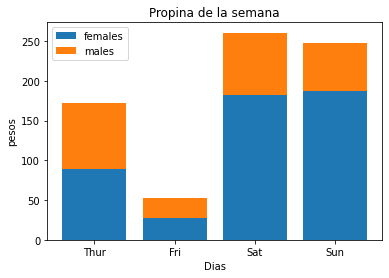

In [ ]:
plt.bar(males["day"], males["tip"])
plt.bar(females["day"], females["tip"], bottom=males["tip"])
plt.title("Propina de la semana")
plt.xlabel("Dias")
plt.ylabel("pesos")
plt.legend(["females", "males"])
plt.show()

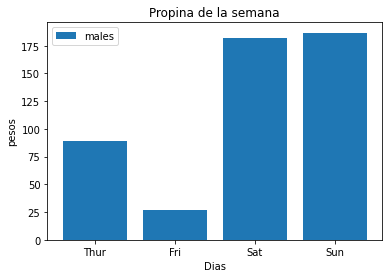

In [ ]:
plt.bar(males["day"], males["tip"])
plt.title("Propina de la semana")
plt.xlabel("Dias")
plt.ylabel("pesos")
plt.legend(["males"])
plt.show()

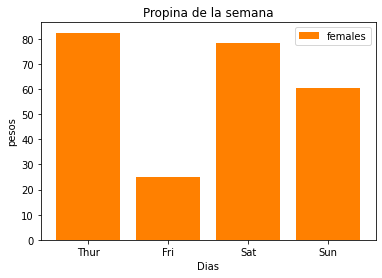

In [ ]:
plt.bar(females["day"], females["tip"], color = "#FF8000")
plt.title("Propina de la semana")
plt.xlabel("Dias")
plt.ylabel("pesos")
plt.legend(["females"])
plt.show()

2. Repite el el gráfico anterior, pero esta vez, investiga cómo se hace y cambia los colores default por otros.

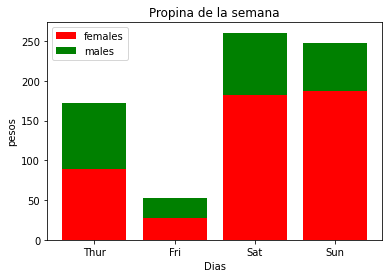

In [ ]:
plt.bar(males["day"], males["tip"],color=["red"])
plt.bar(females["day"], females["tip"], bottom=males["tip"], color = ["green"])
plt.title("Propina de la semana")
plt.xlabel("Dias")
plt.ylabel("pesos")
plt.legend(["females", "males"])
plt.show()

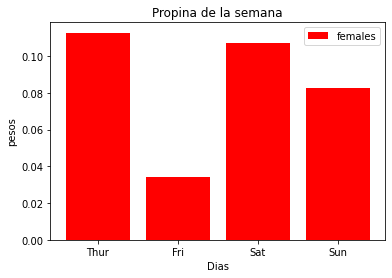

In [ ]:
plt.bar(females["day"], (females["tip"]/sum(data["tip"])),color=["red"])
plt.title("Propina de la semana")
plt.xlabel("Dias")
plt.ylabel("pesos")
plt.legend(["females"])
plt.show()

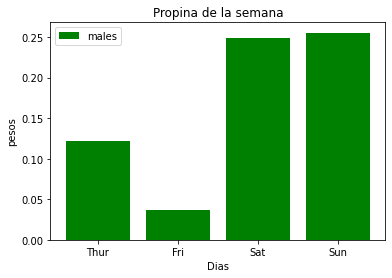

In [ ]:
plt.bar(males["day"], (males["tip"]/sum(data["tip"])),color=["green"])
plt.title("Propina de la semana")
plt.xlabel("Dias")
plt.ylabel("pesos")
plt.legend(["males"])
plt.show()

3. Usa los colores del ejercicio anterior, pero esta vez, usa los datos en porcentaje y genera un gráfico de barras.

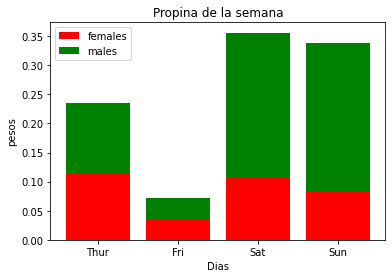

In [ ]:
plt.bar(females["day"], (females["tip"]/sum(data["tip"])), color=["red"])
plt.bar(males["day"], (males["tip"]/sum(data["tip"])), bottom=(females["tip"]/sum(data["tip"])), color=["green"])
plt.title("Propina de la semana")
plt.xlabel("Dias")
plt.ylabel("pesos")
plt.legend(["females", "males"])
plt.show()

In [ ]:
females["tip"].tolist()

[82.42, 25.03, 78.45, 60.61]

4. Genera un gráfico de área para representar los datos anteriores. Usa los dos mismos colores que haz usado en los ejercicios anteriores.

In [ ]:
femalesa, malesa,days = np.array(females["tip"].tolist()),np.array(males["tip"].tolist()),np.array(males["day"].tolist())

femalesg = femalesa / (femalesa + malesa)
malesg = malesa / (malesa + femalesa)

print(femalesg)
print(malesg)
     

[0.47966013 0.48171671 0.30126728 0.24499778]
[0.52033987 0.51828329 0.69873272 0.75500222]


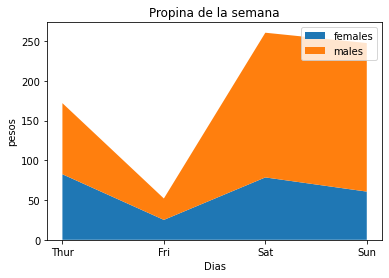

In [ ]:
plt.stackplot(days,femalesa, malesa)
plt.title("Propina de la semana")
plt.xlabel("Dias")
plt.ylabel("pesos")
plt.legend(["females", "males"])
plt.show()

5. Suma los datos de _males_ y _females_ para tener las propinas totales por día de la semana. Genera un gráfico de waffle para representar esa data. En vez de cuadros, usa alguna otra forma.

Tip: puedes consultar https://fontawesome.com/search para ver formas que puedes usar.

In [ ]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 18.9 MB/s eta 0:00:00


In [ ]:
from pywaffle import Waffle

In [ ]:
sum(females["tip"])

246.51

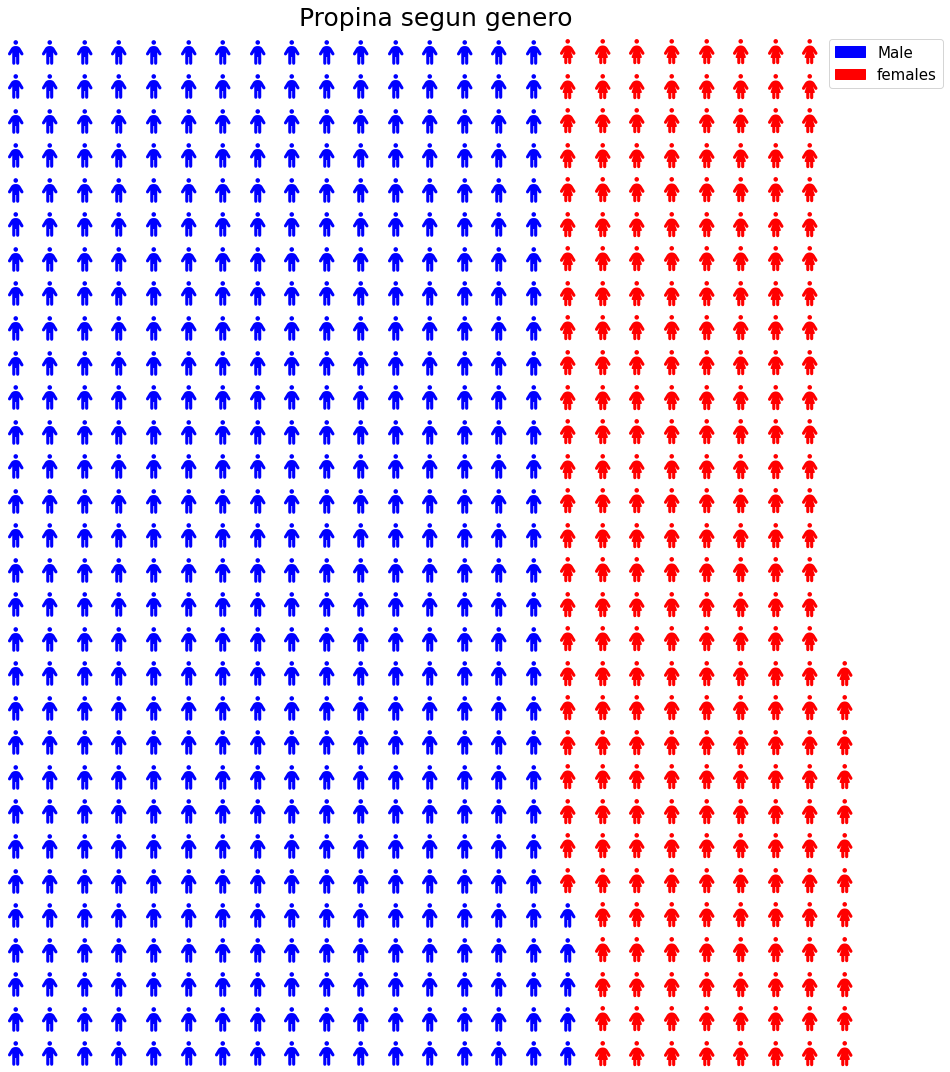

In [ ]:
valores = {"Male": sum(males["tip"]), "females" : sum(females["tip"])}

plt.figure(
    FigureClass = Waffle,
    rows = 30,
    values = valores,
    legend={'bbox_to_anchor': (1.1, 1), 'fontsize': 15},
    icons = ["male",'female'],
    figsize=(15,15),
    font_size=25,
    colors = ["blue","red"]
    ) 

plt.title("Propina segun genero",fontsize=25)
plt.show() 